📖 참고 : 이것이 데이터 분석이다 with 파이썬

# 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

## 1. 라이브러리 호출 및 데이터 읽기

In [1]:
import pandas as pd

In [2]:
chipo = pd.read_csv('../data/chipotle.tsv', sep='\t') # 지금까지는 데이터 위치가 같은 폴더내였지만 지금은 아남

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
print(chipo.shape) # 데이터의 행과 열의 크기 반환
print(chipo.info()) # 행의 구성 정보와 열의 구성 정보 나타내기

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- order_id : 주문번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

## 2. EDA(탐색적 자료 분석)

### 수치형 변수 기초 통계량 확인

In [5]:
chipo['order_id'] = chipo['order_id'].astype(str)

In [6]:
chipo.describe() # 수치형 피처에 대해서만 기초 통계량을 확인할 수 있음

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


=> 평균이 약 1.07인 것을 보고 '한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다'라는 것을 알 수 있다

### 피처 내에 몇 개의 범주가 있는지 확인

In [7]:
print(len(chipo['order_id'].unique())) # order_id의 개수
print(len(chipo['item_name'].unique())) # item_name의 개수

1834
50


### 가장 많이 주문한 Top 10 출력하기

In [8]:
item_count = chipo['item_name'].value_counts()[:10]

In [9]:
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [10]:
for idx, (val, cnt) in enumerate(item_count.iteritems()):
    print("Top", idx, ":", val, cnt)

Top 0 : Chicken Bowl 726
Top 1 : Chicken Burrito 553
Top 2 : Chips and Guacamole 479
Top 3 : Steak Burrito 368
Top 4 : Canned Soft Drink 301
Top 5 : Chips 211
Top 6 : Steak Bowl 211
Top 7 : Bottled Water 162
Top 8 : Chicken Soft Tacos 115
Top 9 : Chips and Fresh Tomato Salsa 110


In [11]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템 주문 개수와 총량 

In [12]:
order_count = chipo.groupby('item_name')['order_id'].count()
order_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [13]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### 시각화

x : 아이템 이름을 숫자로 라벨링, y : 아이템별 주문의 총량

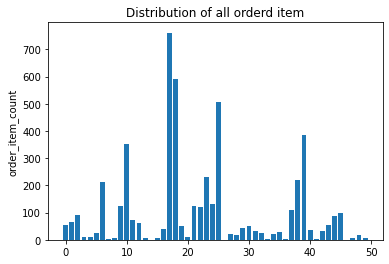

In [14]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('order_item_count')
plt.title('Distribution of all orderd item')

plt.show()

## 3. 데이터 전처리

### item_price를 수치형으로 바꾸기

In [15]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

## 4. EDA 심화

### 주문당 평균 계산금액 출력하기

In [16]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

- 한 사람이 '약 18달러 가량의 주문을 할 것이다'라는 인사이트를 얻을 수 있음

### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

In [17]:
chipo.groupby('order_id')['item_price'].sum() >= 10

order_id
1       True
10      True
100     True
1000    True
1001    True
        ... 
995     True
996     True
997     True
998     True
999     True
Name: item_price, Length: 1834, dtype: bool

### 각 아이템의 가격 구하기

In [18]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10] # 10개만 출력

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


### 각 아이템의 가격 시각화

In [19]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

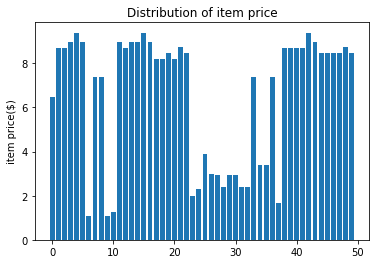

In [20]:
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

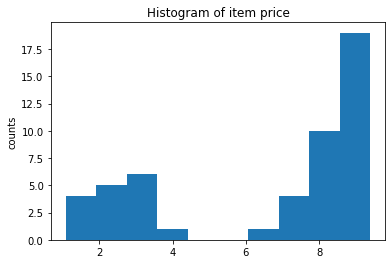

In [21]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [22]:
item_price

[6.49,
 8.69,
 8.69,
 8.99,
 9.39,
 8.99,
 1.09,
 7.4,
 7.4,
 1.09,
 1.25,
 8.99,
 8.69,
 8.99,
 8.99,
 9.39,
 8.99,
 8.19,
 8.19,
 8.49,
 8.19,
 8.75,
 8.49,
 1.99,
 2.29,
 3.89,
 3.0,
 2.95,
 2.39,
 2.95,
 2.95,
 2.39,
 2.39,
 7.4,
 3.39,
 3.39,
 7.4,
 1.69,
 8.69,
 8.69,
 8.69,
 8.69,
 9.39,
 8.99,
 8.49,
 8.49,
 8.49,
 8.49,
 8.75,
 8.49]

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [23]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:10]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
205,12,109.90
511,17,104.59
491,10,102.00
1449,11,95.39


In [24]:
chipo.groupby('order_id').sum()

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


### 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [25]:
chipo_salad= chipo[chipo['item_name'] == 'Veggie Salad Bowl']

# 한 주문 내에서 중복 집계된 item_name을 제거
# chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))

18


### 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [26]:
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(len(chipo_chicken_result))

33
